## Import Libraries

In [60]:
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['svg']

# ML Modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Saving and importing trained models
import pickle

import mpld3

## Import and Review Data

In [61]:
df = pd.read_csv("resume.csv")
df.head()

,job_ad_id,job_city,job_industry,job_type,job_fed_contractor,job_equal_opp_employer,job_ownership,job_req_any,job_req_communication,job_req_education,...,honors,worked_during_school,years_experience,computer_skills,special_skills,volunteer,military,employment_holes,has_email_address,resume_quality
0,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,0,0,0,1,0,low
1,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,1,1,0,1,high
2,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,1,6,1,0,0,0,0,0,low
3,384,Chicago,manufacturing,supervisor,NaN,1,unknown,1,0,0,...,0,0,6,1,1,1,0,1,1,high
4,385,Chicago,other_service,secretary,0.0,1,nonprofit,1,0,0,...,0,1,22,1,0,0,0,0,1,high


In [62]:
# Find the interested column/variable types: firstname, race, and gender.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4870 entries, 0 to 4869
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_ad_id               4870 non-null   int64  
 1   job_city                4870 non-null   object 
 2   job_industry            4870 non-null   object 
 3   job_type                4870 non-null   object 
 4   job_fed_contractor      3102 non-null   float64
 5   job_equal_opp_employer  4870 non-null   int64  
 6   job_ownership           4870 non-null   object 
 7   job_req_any             4870 non-null   int64  
 8   job_req_communication   4870 non-null   int64  
 9   job_req_education       4870 non-null   int64  
 10  job_req_min_experience  2124 non-null   object 
 11  job_req_computer        4870 non-null   int64  
 12  job_req_organization    4870 non-null   int64  
 13  job_req_school          4870 non-null   object 
 14  received_callback       4870 non-null   

In [63]:
df.firstname.describe()

count       4870
unique        36
top       Tamika
freq         256
Name: firstname, dtype: object

In [64]:
name_freq = df['firstname'].value_counts()
name_freq.head(15)

firstname
Tamika      256
Anne        242
Allison     232
Latonya     230
Emily       227
Latoya      226
Kristen     213
Ebony       208
Tanisha     207
Jill        203
Lakisha     200
Kenya       196
Laurie      195
Sarah       193
Meredith    187
Name: count, dtype: int64

In [65]:
df.received_callback.describe()

count    4870.000000
mean        0.080493
std         0.272083
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: received_callback, dtype: float64

Initial observations: there are 4870 entries, but there are only 36 unique names. These names are divided into stereotypical racial names ('Tamika' for example, is a stereotypical name for a black woman. This name appeared 256 in the samples.)

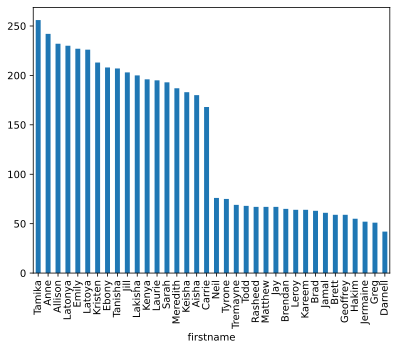

In [79]:
fig, ax = plt.subplots()

df['firstname'].value_counts().plot(kind='bar')

html_plot = mpld3.fig_to_html(fig)

with open('name_frequency.html', 'w') as file:
    file.write(html_plot)

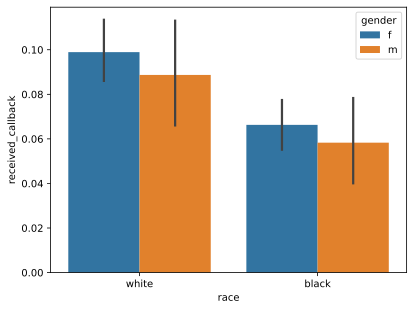

In [82]:
fig, ax = plt.subplots()

sns.barplot(data=df, x='race', y='received_callback', hue='gender')

html_plot = mpld3.fig_to_html(fig)

with open('race_gender_call.html', 'w') as file:
    file.write(html_plot)

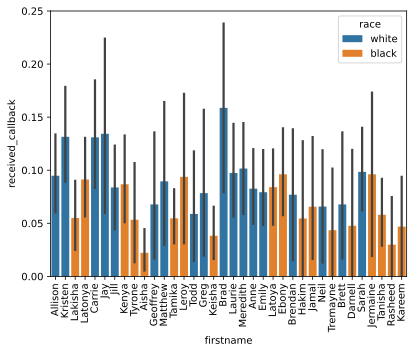

In [88]:
fig, ax = plt.subplots()

sns.barplot(data=df, x='firstname', y='received_callback', hue='race')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)


html_plot = mpld3.fig_to_html(fig)

with open('firstname_race_callback.html', 'w') as file:
    file.write(html_plot)

In [68]:
#Selecting gender, race, and name that can affect callback. 
grn = df[['gender', 'race', 'firstname']].copy()
grn['gender'] = LabelEncoder().fit_transform(grn['gender'])
grn['race'] = LabelEncoder().fit_transform(grn['race'])
grn['firstname'] = LabelEncoder().fit_transform(grn['race'])

call_back = df['received_callback']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(grn, call_back, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get the coefficient importance of race, gender, and names. 
grn_importance = abs(model.coef_[0])
grn_names = X_train.columns

sorted_features = sorted(zip(grn_importance, grn_names), reverse=True)

race: 0.24472007678043511
firstname: 0.24472007678043511
gender: 0.13992995546092876


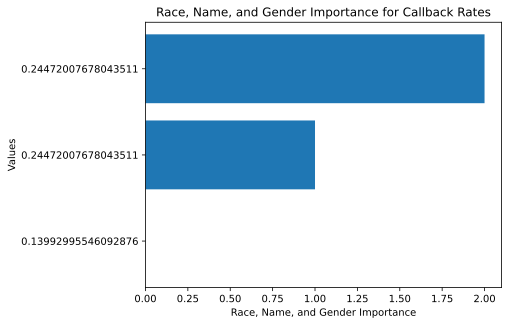

In [69]:
# Print the feature importance
for importance, feature in sorted_features:
    print(f"{feature}: {importance}")

# Visualize feature importance
plt.barh(grn_names, range(len(grn_importance)), tick_label=grn_importance)
plt.xlabel('Race, Name, and Gender Importance')
plt.ylabel('Values')
plt.title('Race, Name, and Gender Importance for Callback Rates')
plt.show()

In [70]:
#Review the accuracy of the model. 
y_predict = model.predict(X_test)

mse2 = mean_squared_error(y_test, y_predict)
r2_2 = r2_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)

print('Logistic Regression:')
print(f"Mean Squared Error: {mse2}, \nR2 Score: {r2_2}, \nAccuracy: {accuracy}")

Logistic Regression:
Mean Squared Error: 0.06570841889117043, 
R2 Score: -0.07032967032967008, 
Accuracy: 0.9342915811088296


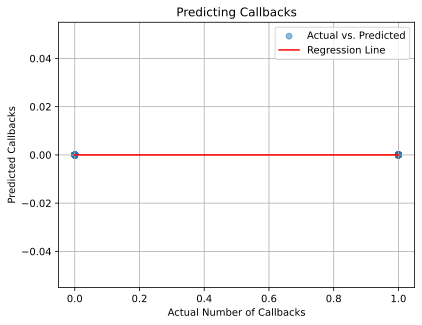

In [71]:
#Graph the visualizatin of the model. 
plt.scatter(y_test, y_predict, alpha=0.5, label='Actual vs. Predicted')
plt.title('Predicting Callbacks')
plt.xlabel('Actual Number of Callbacks')
plt.ylabel('Predicted Callbacks')

# Regression line
reg_line = np.polyfit(y_test, y_predict, 1)
plt.plot(y_test, np.polyval(reg_line, y_test), color='red', label='Regression Line')

plt.legend()
plt.grid(True)
plt.show()

In [72]:
model_pkl_file = "racial_bias_model.pkl"

with open(model_pkl_file, 'wb') as file:
    pickle.dump(model, file)